In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from intent_classification_helper import *

In [3]:
atis_train = pd.read_csv('atis_intents_train.csv', error_bad_lines=False, 
                   engine='python', encoding='utf-8', names=['intent', 'message'])
atis_test = pd.read_csv('atis_intents_test.csv', error_bad_lines=False, 
                   engine='python', encoding='utf-8', names=['intent', 'message'])
assert(set(atis_train['intent']) == set(atis_test['intent']))

C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\2931824440.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  atis_train = pd.read_csv('atis_intents_train.csv', error_bad_lines=False,
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\2931824440.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  atis_test = pd.read_csv('atis_intents_test.csv', error_bad_lines=False,


In [4]:
atis_train['intent'].value_counts()

atis_flight            3666
atis_airfare            423
atis_ground_service     255
atis_airline            157
atis_abbreviation       147
atis_aircraft            81
atis_flight_time         54
atis_quantity            51
Name: intent, dtype: int64

In [5]:
atis_test['intent'].value_counts()

atis_flight            632
atis_airfare            48
atis_airline            38
atis_ground_service     36
atis_abbreviation       33
atis_aircraft            9
atis_quantity            3
atis_flight_time         1
Name: intent, dtype: int64

In [6]:
# encode label
le = LabelEncoder()
atis_train['intent'] = le.fit_transform(atis_train['intent'])
atis_test['intent'] = le.fit_transform(atis_test['intent'])

onehot_encoder = OneHotEncoder()
y_train = onehot_encoder.fit_transform(atis_train['intent'].values.reshape(-1, 1)).todense()
y_test = onehot_encoder.fit_transform(atis_test['intent'].values.reshape(-1, 1)).todense()

In [7]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7])

array(['atis_abbreviation', 'atis_aircraft', 'atis_airfare',
       'atis_airline', 'atis_flight', 'atis_flight_time',
       'atis_ground_service', 'atis_quantity'], dtype=object)

In [8]:
# preprocess text
print('Preprocessing text on training set...')
preprocess_text(atis_train, 'message')

print('Preprocessing text on test set...')
preprocess_text(atis_test, 'message')

Preprocessing text on training set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...


Text preprocessing completed.


Preprocessing text on test set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...
Text preprocessing completed.




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# added this part: tf-idf features vs feature frequence in each record
from sklearn.feature_extraction.text import TfidfVectorizer
import os

feature_numbers=[40, 100, 200, 500, 1000]

for feature_number in feature_numbers:  
    tv = TfidfVectorizer(max_df=1.0, min_df=0, max_features=feature_number)
    
    x_train = atis_train['message'].tolist()
    x_test = atis_test['message'].tolist()

    tv.fit(x_train)
    x_train = tv.transform(x_train).toarray()
    x_test = tv.transform(x_test).toarray()

    vocab = tv.get_feature_names_out()

    print('TF-IDF vocabulary size: ', len(vocab))

    x_train_freq_df = pd.DataFrame(x_train, columns=vocab)
    x_test_freq_df = pd.DataFrame(x_test, columns=vocab)
    
    # main_path = '/content/drive/MyDrive/nlp_datasets/ATIS dataset/models/feature_frequency'
    main_path = 'tf-idf'
    x_train_file_name = 'train_tf-idf_feature_{}.csv'.format(len(vocab))
    x_test_file_name = 'test_tf-idf_feature_{}.csv'.format(len(vocab))

    x_train_freq_df.to_csv(os.path.join(main_path, x_train_file_name), index=False)
    x_test_freq_df.to_csv(os.path.join(main_path, x_test_file_name), index=False)

TF-IDF vocabulary size:  40
TF-IDF vocabulary size:  100
TF-IDF vocabulary size:  200
TF-IDF vocabulary size:  500
TF-IDF vocabulary size:  748


In [11]:
# add label column to tf-idf 40 features
df = pd.read_csv('tf-idf/train_tf-idf_feature_40.csv')
df['label'] = atis_train['intent']
df.to_csv('tf-idf/train_tf-idf_feature_40.csv', index=False)

df = pd.read_csv('tf-idf/train_tf-idf_feature_40.csv')
df['label'] = atis_test['intent']
df.to_csv('tf-idf/train_tf-idf_feature_40.csv', index=False)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

def rf_tf_idf(feature_numbers=[40, 100, 200, 500, 1000]):
  
  # try different number of features
  for feature_number in feature_numbers:  
    tv = TfidfVectorizer(max_df=1.0, min_df=0, max_features=feature_number)
    
    x_train = atis_train['message'].tolist()
    x_test = atis_test['message'].tolist()

    tv.fit(x_train)
    x_train = tv.transform(x_train).toarray()
    x_test = tv.transform(x_test).toarray()

    vocab = tv.get_feature_names_out()

    print('TF-IDF vocabulary size: ', len(vocab))
    #print(pd.DataFrame(x_train, columns=vocab))
    
    model = random_foreset_classifier(x_train=x_train, y_train=y_train, num_features=len(vocab), n_estimators=150, max_depth=None, saving=False)
    evaluate_model(model=model, name='random_forest_{}_features_n_estimators=150_max_depth=None'.format(len(vocab)), x_test=x_test, y_test=y_test, num_features=len(vocab),
                   path='tf-idf', filename='evaluation_rf.csv')

    print()
    if feature_number < len(vocab):
      break

In [13]:
rf_tf_idf()

TF-IDF vocabulary size:  40


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_40_features_n_estimators=150_max_depth=None
accuracy score:  0.8725
balanced accuracy score:  0.44793806443852247
weighted precision:  0.9005761695906433
weighted recall:  0.8725
weighted f1 score:  0.8686163549944778
macro f1 score:  0.41626861428835404

TF-IDF vocabulary size:  100


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_100_features_n_estimators=150_max_depth=None
accuracy score:  0.94375
balanced accuracy score:  0.6798899113553927
weighted precision:  0.9459449567690325
weighted recall:  0.94375
weighted f1 score:  0.9434850746761501
macro f1 score:  0.6566357978829375

TF-IDF vocabulary size:  200


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:142: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\Ad

evaluate the model:  random_forest_200_features_n_estimators=150_max_depth=None
accuracy score:  0.9525
balanced accuracy score:  0.9363317973203049
weighted precision:  0.962708372431222
weighted recall:  0.9525
weighted f1 score:  0.9547672503152005
macro f1 score:  0.8693084727460967

TF-IDF vocabulary size:  500


c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:142: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnin

evaluate the model:  random_forest_500_features_n_estimators=150_max_depth=None
accuracy score:  0.95625
balanced accuracy score:  0.9059648891479753
weighted precision:  0.9657694649100899
weighted recall:  0.95625
weighted f1 score:  0.9587151835093012
macro f1 score:  0.852397037874979

TF-IDF vocabulary size:  748


c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:142: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnin

evaluate the model:  random_forest_748_features_n_estimators=150_max_depth=None
accuracy score:  0.96
balanced accuracy score:  0.904151861721815
weighted precision:  0.966541434178173
weighted recall:  0.96
weighted f1 score:  0.9616130064465979
macro f1 score:  0.8617750928122445



c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:142: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_graph(model_name, eval_path, reverse_rows=False):
  # plot the feature importance graph for random forest
  plt.title('Performance of {} vs Feature Numbers'.format(model_name))
  plt.xlabel('Number of Features')
  plt.ylabel('Score')

  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
  if reverse_rows:
    eval_result = eval_result.loc[::-1]

  feature_numbers = eval_result['num_features'].to_list()
  accuracy_scores = eval_result['accuracy score'].to_list()
  balanced_accuracy_scores = eval_result['balanced accuracy score'].to_list()
  weighted_precision = eval_result['weighted precision'].to_list()
  weighted_recall = eval_result['weighted recall'].to_list()
  weighted_f1_scores = eval_result['weighted f1 score'].to_list()
  macro_f1_scores = eval_result['macro f1 score'].to_list()

  plt.plot(feature_numbers, accuracy_scores, label='accuracy score')
  plt.plot(feature_numbers, weighted_precision, label='weighted precision')
  plt.plot(feature_numbers, weighted_recall, label='weighted recall')
  plt.plot(feature_numbers, weighted_f1_scores, label='weighted f1 score')
  plt.legend()
  plt.grid()

  plt.figure()
  plt.xlabel('Number of Features')
  plt.ylabel('Score')
  plt.plot(feature_numbers, balanced_accuracy_scores, label='balanced accuracy score')
  plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')

  plt.legend()
  plt.grid()
  plt.show()

In [16]:
atis_train['message'].head()

0       want fly boston 838 arrive denver 1110 morning
1    flights available pittsburgh baltimore thursda...
2    arrival time san francisco 755 flight leaving ...
3                      cheapest airfare tacoma orlando
4    round trip fares pittsburgh philadelphia 1000 ...
Name: message, dtype: object

In [17]:
# word2vec
sents_train = []

for row in atis_train['message'].tolist():
  sents_train.append(row.split())
  
sents_test = []

for row in atis_test['message'].tolist():
  sents_test.append(row.split())

In [18]:
!pip install gensim

     --------------------------------------- 23.9/23.9 MB 32.7 MB/s eta 0:00:00
     ------------------------------------- 983.8/983.8 kB 31.4 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 kB ? eta 0:00:00


In [19]:
from gensim.models import Word2Vec

In [24]:
model_w2v = Word2Vec(sents_train, max_final_vocab=num_features)

In [ ]:
key = 

In [27]:
len(model_w2v.wv)

40

In [29]:
model_w2v.wv.index_to_key[:]

['flights',
 'flight',
 'boston',
 'show',
 'san',
 'denver',
 'francisco',
 'atlanta',
 'pittsburgh',
 'dallas',
 'baltimore',
 'philadelphia',
 'like',
 'list',
 'airlines',
 'washington',
 'leaving',
 'please',
 'morning',
 'pm',
 'would',
 'fly',
 'fare',
 'first',
 'oakland',
 'wednesday',
 'ground',
 'trip',
 'transportation',
 'cheapest',
 'need',
 'class',
 'round',
 'arriving',
 'city',
 'available',
 'afternoon',
 'american',
 'one',
 'give']

In [31]:
import copy

for num_features in [40]:
#for num_features in [40, 100, 200, 500, 1000]:
  model_w2v = Word2Vec(sents_train, max_final_vocab=num_features)

  x_train_freq_df = pd.DataFrame(columns = model_w2v.wv.index_to_key[:])
  x_test_freq_df = pd.DataFrame(columns = model_w2v.wv.index_to_key[:])

  print('number of features: ', len(model_w2v.wv))

  freq_dic = {}
  for word in model_w2v.wv.index_to_key[:]:
    freq_dic[word] = 0

  for i in range(len(sents_train)):
    temp_freq_dic = copy.deepcopy(freq_dic)
    sent = sents_train[i]      
    for w in sent:
      if w in model_w2v.wv.index_to_key[:]:
        temp_freq_dic[w] += 1

    x_train_freq_df = x_train_freq_df.append(temp_freq_dic, ignore_index=True)
  
  for i in range(len(sents_test)):
    temp_freq_dic = copy.deepcopy(freq_dic)
    sent = sents_test[i]      
    for w in sent:
      if w in model_w2v.wv.index_to_key[:]:
        temp_freq_dic[w] += 1

    x_test_freq_df = x_test_freq_df.append(temp_freq_dic, ignore_index=True)

  main_path = 'word2vec'
  x_train_file_name = 'train_word2vec_feature_{}.csv'.format(len(model_w2v.wv))
  x_test_file_name = 'test_word2vec_feature_{}.csv'.format(len(model_w2v.wv))

  x_train_freq_df.to_csv(os.path.join(main_path, x_train_file_name), index=False)
  x_test_freq_df.to_csv(os.path.join(main_path, x_test_file_name), index=False)

number of features:  40


C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3067217387.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train_freq_df = x_train_freq_df.append(temp_freq_dic, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3067217387.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train_freq_df = x_train_freq_df.append(temp_freq_dic, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3067217387.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train_freq_df = x_train_freq_df.append(temp_freq_dic, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3067217387.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [32]:
# add label column
df = pd.read_csv('word2vec/train_word2vec_feature_40.csv')
df['label'] = atis_train['intent']
df.to_csv('word2vec/train_word2vec_feature_40.csv', index=False)

In [33]:
df = pd.read_csv('word2vec/test_word2vec_feature_40.csv')
df['label'] = atis_test['intent']
df.to_csv('word2vec/test_word2vec_feature_40.csv', index=False)

In [37]:
def w2v_rf():
  # chaneg min_count parameter to control different number of features
  #for limit in range(1, 11): 
  #for limit in range(12, 31):
  #for limit in range(32, 51):
  for num in [40, 100, 200, 500, 1000]:
    #model_w2v = Word2Vec(sents_train, min_count=limit)
    model_w2v = Word2Vec(sents_train, max_final_vocab=num)
    model_w2v.train(sents_train, total_examples=model_w2v.corpus_count, epochs=30)
    num_features = len(model_w2v.wv)

    w2v_ebd_len = model_w2v.wv['flight'].shape[0]
    x_train_w2v = np.zeros([len(atis_train['message']), w2v_ebd_len]) # initialize to zero, save zero padding
    x_test_w2v = np.zeros([len(atis_test['message']), w2v_ebd_len])

    # build x_train_w2v with averaged word embedding
    for i in range(len(sents_train)):
      sent = sents_train[i]
      if sent == []: # handle the case with division, if it is empty sent, set to zero
        continue 
      word_count = 0
      for j in range(len(sent)):
        word = sent[j]
        if word not in model_w2v.wv:
          continue
        word_count += 1
        x_train_w2v[i] = np.add(x_train_w2v[i], model_w2v.wv[word])
      if word_count > 0:
        x_train_w2v[i] = np.divide(x_train_w2v[i], word_count)
    
    y_train_w2v = y_train

    # build x_test_w2v with averaged word embedding
    for i in range(len(sents_test)):
      sent = sents_test[i]
      if sent == []: 
        continue 
      word_count = 0
      for j in range(len(sent)):
        word = sent[j]
        if word not in model_w2v.wv:
          continue
        word_count += 1
        x_test_w2v[i] = np.add(x_test_w2v[i], model_w2v.wv[word])
      if word_count > 0:
        x_test_w2v[i] = np.divide(x_test_w2v[i], word_count)

      y_test_w2v = y_test

    model_rf_w2v = RandomForestClassifier(n_estimators=150, max_depth=None)
    model_rf_w2v.fit(x_train_w2v, y_train_w2v)

    evaluate_model(model=model_rf_w2v, name='random_forest_w2v_features_{}_n_estimators=150_max_depth=None'.format(num_features), x_test=x_test_w2v, y_test=y_test_w2v, num_features=num_features,
                   path='word2vec', filename='evaluation_rf_w2v.csv')

In [38]:
w2v_rf()

c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_40_n_estimators=150_max_depth=None
accuracy score:  0.875
balanced accuracy score:  0.4586444685024798
weighted precision:  0.9051881720430107
weighted recall:  0.875
weighted f1 score:  0.8737270367412141
macro f1 score:  0.42719664409959934


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_w2v_features_99_n_estimators=150_max_depth=None
accuracy score:  0.89625
balanced accuracy score:  0.486632754089866
weighted precision:  0.9099893582733174
weighted recall:  0.89625
weighted f1 score:  0.8885988502243504
macro f1 score:  0.4947998122562248


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:142: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\Ad

evaluate the model:  random_forest_w2v_features_197_n_estimators=150_max_depth=None
accuracy score:  0.89875
balanced accuracy score:  0.5452638056110741
weighted precision:  0.9078311329897882
weighted recall:  0.89875
weighted f1 score:  0.8896271446438345
macro f1 score:  0.5592688675309452


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:142: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\Ad

evaluate the model:  random_forest_w2v_features_349_n_estimators=150_max_depth=None
accuracy score:  0.89875
balanced accuracy score:  0.5500146892812199
weighted precision:  0.90501395173454
weighted recall:  0.89875
weighted f1 score:  0.8863457803185406
macro f1 score:  0.5545695557196768


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:142: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,
c:\Users\Ad

evaluate the model:  random_forest_w2v_features_349_n_estimators=150_max_depth=None
accuracy score:  0.89625
balanced accuracy score:  0.5463446822488711
weighted precision:  0.9043096113090138
weighted recall:  0.89625
weighted f1 score:  0.8843232930689505
macro f1 score:  0.5504808832156843


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:142: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')
c:\Users\Adam\IntentClassification\ATIS\intent_classification_helper.py:143: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_result = eval_result.append({'model': name, 'accuracy score': accuracy_score_val, 'balanced accuracy score': balanced_accuracy,


C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3798323360.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')


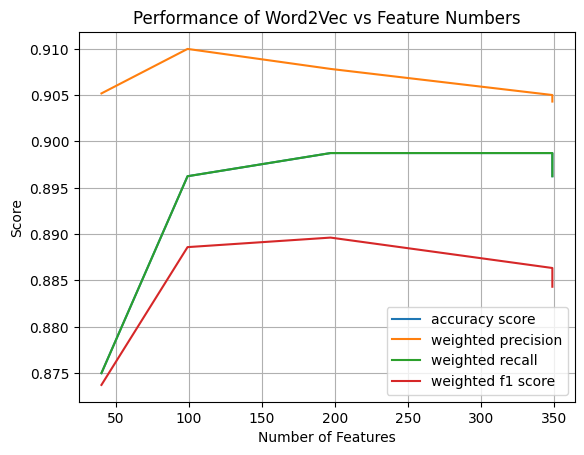

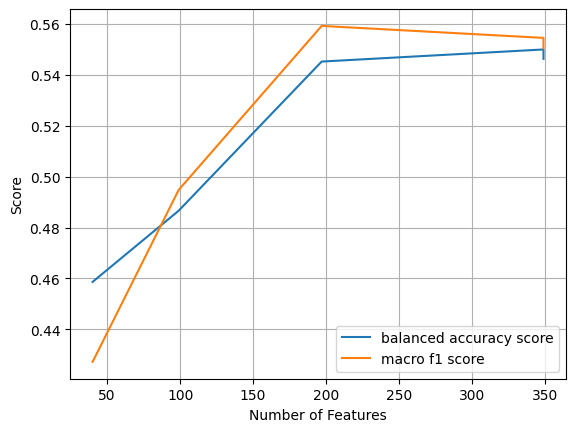

In [39]:
eval_path='word2vec/evaluation_rf_w2v.csv'
plot_feature_graph(model_name='Word2Vec', eval_path=eval_path, reverse_rows=True)

In [40]:
#Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [41]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sents_train)]

In [ ]:
model_d2v = Doc2Vec(documents, min_count=1, epochs=30)

In [ ]:
len(model_d2v.wv.vocab)

763

In [ ]:
model_d2v.wv.vectors.shape

(763, 100)

In [ ]:
model_d2v.corpus_count

29328

In [ ]:
model_d2v.train(documents, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)

In [ ]:
len(model_d2v.wv.vocab)

763

In [ ]:
model_d2v.infer_vector(sents_train[0]).shape[0]

(100,)

In [48]:
for num_features in [130]:
#for num_features in [40, 100, 200, 500, 1000]:
  model_d2v = Doc2Vec(documents, max_vocab_size=num_features)

  x_train_freq_df = pd.DataFrame(columns = model_d2v.wv.index_to_key[:])
  x_test_freq_df = pd.DataFrame(columns = model_d2v.wv.index_to_key[:])

  print('number of features: ', len(model_d2v.wv))

  freq_dic = {}
  for word in model_d2v.wv.index_to_key[:]:
    freq_dic[word] = 0

  for i in range(len(sents_train)):
    temp_freq_dic = copy.deepcopy(freq_dic)
    sent = sents_train[i]      
    for w in sent:
      if w in model_d2v.wv.index_to_key[:]:
        temp_freq_dic[w] += 1

    x_train_freq_df = x_train_freq_df.append(temp_freq_dic, ignore_index=True)
  
  for i in range(len(sents_test)):
    temp_freq_dic = copy.deepcopy(freq_dic)
    sent = sents_test[i]      
    for w in sent:
      if w in model_d2v.wv.index_to_key[:]:
        temp_freq_dic[w] += 1

    x_test_freq_df = x_test_freq_df.append(temp_freq_dic, ignore_index=True)

  main_path = 'doc2vec'
  x_train_file_name = 'train_doc2vec_feature_{}.csv'.format(len(model_d2v.wv))
  x_test_file_name = 'test_doc2vec_feature_{}.csv'.format(len(model_d2v.wv))

  x_train_freq_df.to_csv(os.path.join(main_path, x_train_file_name), index=False)
  x_test_freq_df.to_csv(os.path.join(main_path, x_test_file_name), index=False)

number of features:  40


C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3675730104.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train_freq_df = x_train_freq_df.append(temp_freq_dic, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3675730104.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train_freq_df = x_train_freq_df.append(temp_freq_dic, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3675730104.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train_freq_df = x_train_freq_df.append(temp_freq_dic, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3675730104.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [49]:
# add label column
df = pd.read_csv('doc2vec/train_doc2vec_feature_40.csv')
df['label'] = atis_train['intent']
df.to_csv('doc2vec/train_doc2vec_feature_40.csv', index=False)

df = pd.read_csv('doc2vec/test_doc2vec_feature_40.csv')
df['label'] = atis_test['intent']
df.to_csv('doc2vec/test_doc2vec_feature_40.csv', index=False)

In [52]:
def d2v_rf():
  # change min_count parameter to control different number of features
  for num_features in [130]:
  # for limit in range(1, 51):
    #model_d2v = Doc2Vec(documents, min_count=limit, epochs=30)
    model_d2v = Doc2Vec(documents, max_vocab_size=num_features, epochs=30)
    model_d2v.train(documents, total_examples=model_d2v.corpus_count, epochs=model_d2v.epochs)
    num_features = len(model_d2v.wv)

    d2v_ebd_len = model_d2v.infer_vector(sents_train[0]).shape[0]
    x_train_d2v = np.zeros([len(atis_train['message']), d2v_ebd_len]) # initialize to zero, save zero padding
    x_test_d2v = np.zeros([len(atis_test['message']), d2v_ebd_len])

    for i in range(len(sents_train)):
      sent = sents_train[i]
      x_train_d2v[i] = model_d2v.infer_vector(sent)
    
    y_train_d2v = y_train

    for i in range(len(sents_test)):
      sent = sents_test[i]
      x_test_d2v[i] = model_d2v.infer_vector(sent)

    y_test_d2v = y_test

    model_rf_d2v = RandomForestClassifier(n_estimators=150, max_depth=None)
    model_rf_d2v.fit(x_train_d2v, y_train_d2v)

    evaluate_model(model=model_rf_d2v, name='random_forest_d2v_features_{}_n_estimators=150_max_depth=None'.format(num_features), x_test=x_test_d2v, y_test=y_test_d2v, num_features=num_features,
                   path='doc2vec', filename='evaluation_rf_d2v.csv')

In [53]:
d2v_rf()

c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


evaluate the model:  random_forest_d2v_features_40_n_estimators=150_max_depth=None
accuracy score:  0.86625
balanced accuracy score:  0.4603599704574055
weighted precision:  0.895411792785854
weighted recall:  0.86625
weighted f1 score:  0.8679582880490209
macro f1 score:  0.4433517923846487


c:\Users\Adam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# combine evaluation result of 40 features into a single csv

df1 = pd.read_csv('tf-idf/evaluation_rf.csv')
df2 = pd.read_csv('doc2vec/evaluation_rf_d2v.csv')
df3 = pd.read_csv('word2vec/evaluation_rf_w2v.csv')

In [55]:
df1.iloc[0]

model                      random_forest_40_features_n_estimators=150_max...
accuracy score                                                        0.8725
balanced accuracy score                                             0.447938
weighted precision                                                  0.900576
weighted recall                                                       0.8725
weighted f1 score                                                   0.868616
macro f1 score                                                      0.416269
num_features                                                              40
Name: 0, dtype: object

In [58]:
df2.iloc[0]

model                      random_forest_d2v_features_40_n_estimators=150...
accuracy score                                                       0.86625
balanced accuracy score                                              0.46036
weighted precision                                                  0.895412
weighted recall                                                      0.86625
weighted f1 score                                                   0.867958
macro f1 score                                                      0.443352
num_features                                                              40
Name: 0, dtype: object

In [57]:
df3.iloc[0]

model                      random_forest_w2v_features_40_n_estimators=150...
accuracy score                                                         0.875
balanced accuracy score                                             0.458644
weighted precision                                                  0.905188
weighted recall                                                        0.875
weighted f1 score                                                   0.873727
macro f1 score                                                      0.427197
num_features                                                              40
Name: 0, dtype: object

In [59]:
df_comb = pd.DataFrame(columns = df1.columns)

In [60]:
df_comb = df_comb.append(df1.iloc[0])
df_comb = df_comb.append(df3.iloc[0])
df_comb = df_comb.append(df2.iloc[0])

C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3667136268.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb = df_comb.append(df1.iloc[0])
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3667136268.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb = df_comb.append(df3.iloc[0])
C:\Users\Adam\AppData\Local\Temp\ipykernel_39788\3667136268.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb = df_comb.append(df2.iloc[0])


In [61]:
df_comb['model'] = df_comb['model'].replace(['random_forest_40_features_n_estimators=150_max_depth=None'], 'random_forest_td-idf_40_features_n_estimators=150_max_depth=None')

In [62]:
df_comb.to_csv('evaluation_combined.csv', index=False)